форма массива X forge: (26, 2)


c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


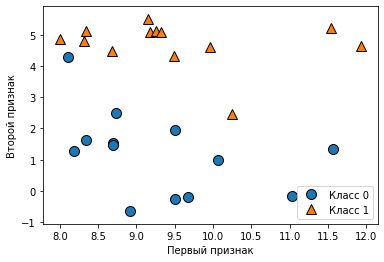

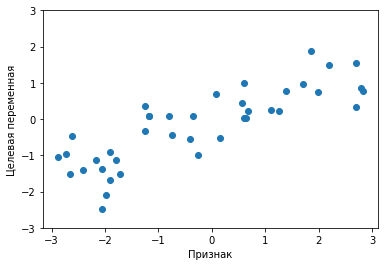

Ключи cancer(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Форма массива data для набора cancer: (569, 30)
Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}
форма массива data для набора boston: (506, 13)
Форма массива extended boston: (506, 104)


c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


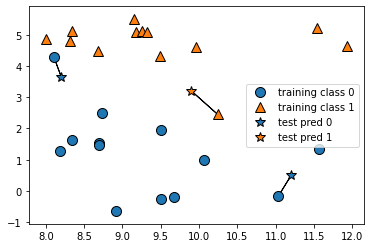

c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


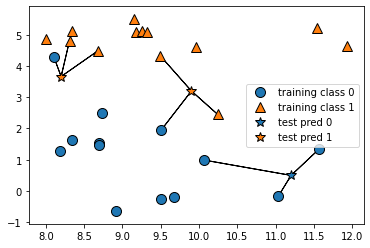

c:\users\валерия смелова\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]
Правильность на тестовом наборе: 0.86


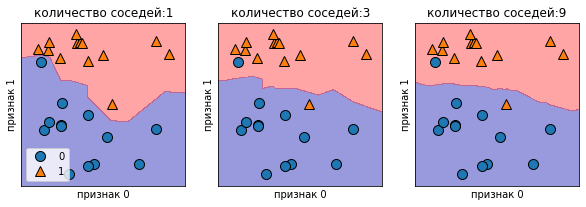

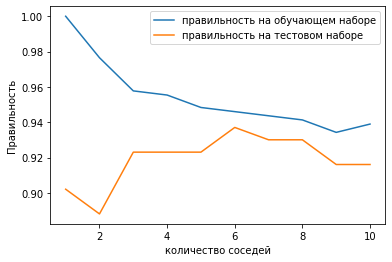

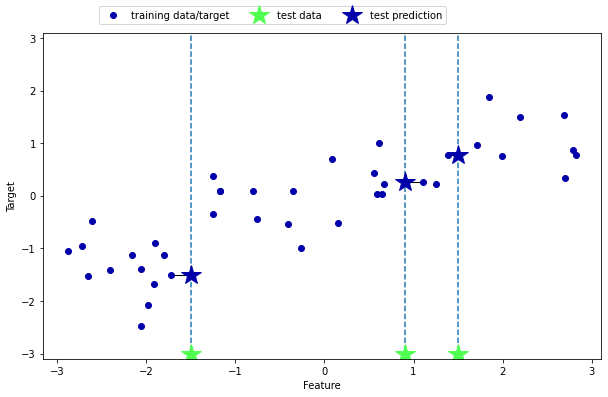

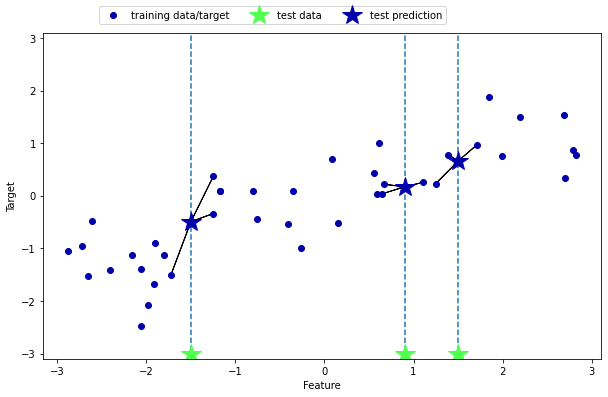

Прогнозы для тестового набора wave:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
R^2 на тестовом наборе wave: 0.83


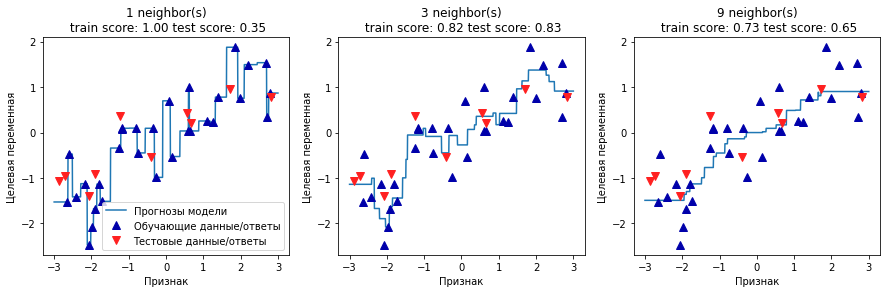

In [3]:
import sklearn
import mglearn
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np

X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("форма массива X forge: {}".format(X.shape))
plt.show()

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.show()

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))
print("Форма массива data для набора cancer: {}".format(cancer.data.shape))
print("Количество примеров для каждого класса:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))


from sklearn.datasets import load_boston
boston = load_boston()
print("форма массива data для набора boston: {}".format(boston.data.shape))

X, y = mglearn.datasets.load_extended_boston()
print("Форма массива extended boston: {}".format(X.shape))
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

#строим границы
fig, axes = plt.subplots(1,3, figsize=(10, 3))
for n_neighbors, ax in zip([1,3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("количество соседей:{}".format(n_neighbors))
    ax.set_xlabel("признак 0")
    ax.set_ylabel("признак 1")
axes[0].legend(loc=3)
plt.show()

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()
plt.show()

mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()


from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Прогнозы для тестового набора wave:\n{}".format(reg.predict(X_test)))
print("R^2 на тестовом наборе wave: {:.2f}".format(reg.score(X_test, y_test)))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
    
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")
    
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы","Тестовые данные/ответы"], loc="best")
plt.show()
    
    
    
    
